In [2]:
import networkx as nx
from RobotGraphModel import RobotGraph
import gym
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pygraphviz import *
from CustomGymEnvs import MujocoGraphWrapper, FetchReachGraphWrapper

home = str(Path.home())

In [4]:
# env_name = 'FetchReach-v1'
# fig_size=(30, 10)
# env = FetchReachGraphWrapper(gym.make(env_name))

# env_name = 'Ant-v2'
# fig_size = (15, 7)
# env = MujocoGraphWrapper(gym.make(env_name))

# env_name = 'HalfCheetah-v2'
# fig_size = (15, 7)
# env = MujocoGraphWrapper(gym.make(env_name))

# env_name = 'Walker2d-v2'
# fig_size = (15, 7)
# env = MujocoGraphWrapper(gym.make(env_name))

env_name = 'Hopper-v2'
fig_size = (15, 7)
env = MujocoGraphWrapper(gym.make(env_name))

In [5]:
rg = env.robot_graph 

In [6]:
def process_joint_name(joint_name):
    separated = joint_name.split(':')[1].split('_') if 'robot0' in joint_name else joint_name.split('_')
    final_key = ''
    for sk in separated:
        if len(sk) == 1:
            final_key += sk + '-'
        else:
            final_key += sk + ' '
    return final_key

joint_names = []
for joint_list in rg.edge_list.values():
    if len(joint_list) > 0:
        joint_names.append(
            process_joint_name(joint_list[0].attrib['name'])
            if len(joint_list) == 1
            else '\n'.join([process_joint_name(j.attrib['name']) for j in joint_list])
        )
    else:
        joint_names.append('w')

In [7]:
for i in range(len(rg.node_list)):
    print(i, rg.node_list[i].attrib['name'])

for e, j in zip(rg.edge_list.keys(), joint_names):
    print(e, j)
    
nodelist = [i for i in range(len(rg.node_list))]
edgelist = rg.edge_list.values()
g = nx.Graph()
g.add_nodes_from(nodelist)

# use PyGraphviz to create the initial graph with lengths
g = AGraph()
g.add_nodes_from(nodelist)

for edge, j in rg.edge_list.items():
    if len(g) > 0:
        g.add_edge(edge[0], edge[1], length=3)
    else:
        g.add_edge(edge[0], edge[1], length=1)    
        
# convert to NetworkX Graph from a PyGraphviz graph
g = nx.nx_agraph.from_agraph(g)
pos = nx.nx_agraph.graphviz_layout(g)

0 leg
1 world
2 thigh
3 foot
4 torso
(4, 1) rootx 
rootz 
rooty 
(2, 4) thigh joint 
(0, 2) leg joint 
(3, 0) foot joint 


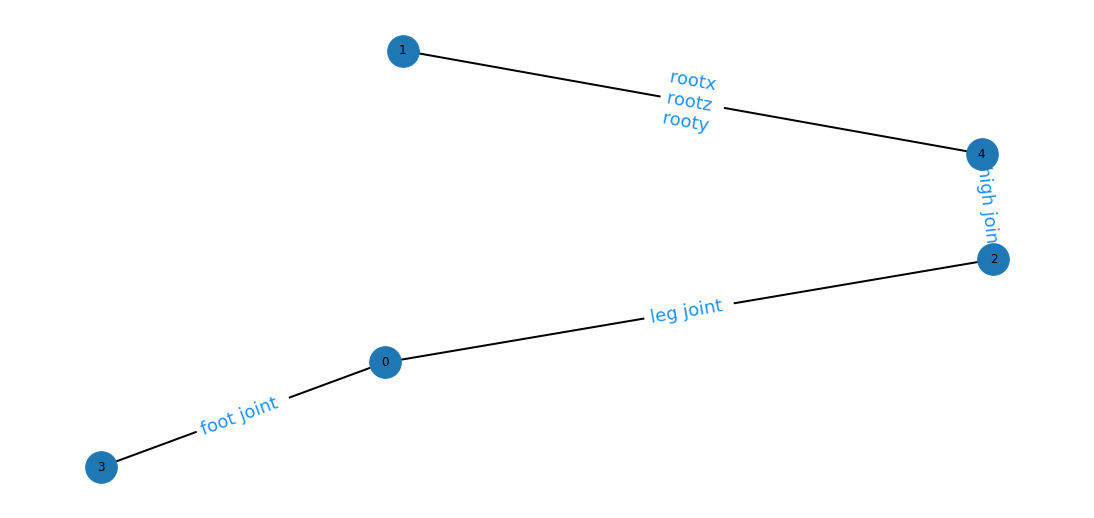

In [8]:
plt.figure(figsize=fig_size)
nx.draw(g,pos,width=2,linewidths=1,\
node_size=1000, with_labels=True, labels={node:node for node in g.nodes()})
nx.draw_networkx_edge_labels(g,pos,
                edge_labels={(f'{edge[0]}', f'{edge[1]}'): j  
                             for edge, j in zip(rg.edge_list.keys(), joint_names)},font_color='dodgerblue', font_size=18)
plt.axis('off')
plt.savefig(f'{env_name}.jpg', dpi=300)
plt.show()

In [ ]:
env = gym.make(env_name)
rg = env.robot_graph
nodelist = [env.sim.model.body_name2id(n.attrib['name']) for n in rg.node_list]
edgelist = [(env.sim.model.body_name2id(rg.node_list[f].attrib['name']), env.sim.model.body_name2id(rg.node_list[t].attrib['name'])) for f, t in zip(rg.edges_from, rg.edges_to)]
g = nx.Graph()
g.add_nodes_from(nodelist)

for edge, j in zip(edgelist, rg.edge_list):
    if j is not None:
        g.add_edge(edge[0], edge[1], length=5)
    else:
        g.add_edge(edge[0], edge[1], length=1)    
    
# g.add_edges_from(edgelist, length=10)
pos = nx.spring_layout(g)

In [ ]:
plt.figure(figsize=(10, 15))
nx.draw(g,pos,edge_color='black',width=2,linewidths=1,\
node_size=500,node_color='cyan',alpha=0.9,\
labels={node:node for node in g.nodes()})
# nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: 'j' if kind is not None else 'w' for edge, kind in zip(edgelist, rg.edge_list)},font_color='red')
nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: np.round(rg.edge_features[i, :], 3) for edge, i in zip(edgelist, range(rg.edge_features.shape[0]))},font_color='red')

plt.axis('off')
plt.savefig(f'{env_name}.jpg', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10, 15))
nx.draw(g,pos,edge_color='black',width=2,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in g.nodes()})

nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: rg.sim.model.joint_name2id(j.attrib['name']) if j is not None else 'w' for edge, j in zip(edgelist, rg.edge_list)},font_color='red')
plt.axis('off')
plt.show()
plt.savefig(f'{env_name}.jpg', dpi=300)